## Image Classification for Stanford Online Product

### Created by : Aditya Nur'ahya (aditya.nurahya17@gmail.com)

In [7]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#### Get Dataset from 'ftp://cs.stanford.edu/cs/cvgl/Stanford_Online_Products.zip'

#### For more : http://cvgl.stanford.edu/projects/lifted_struct/

In [8]:
!wget --no-check-certificate \
  ftp://cs.stanford.edu/cs/cvgl/Stanford_Online_Products.zip \
  -O /tmp/Stanford_Online_Products.zip


--2021-06-23 03:29:30--  ftp://cs.stanford.edu/cs/cvgl/Stanford_Online_Products.zip
           => ‘/tmp/Stanford_Online_Products.zip’
Resolving cs.stanford.edu (cs.stanford.edu)... 171.64.64.64
Connecting to cs.stanford.edu (cs.stanford.edu)|171.64.64.64|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /cs/cvgl ... done.
==> SIZE Stanford_Online_Products.zip ... 3083860082
==> PASV ... done.    ==> RETR Stanford_Online_Products.zip ... done.
Length: 3083860082 (2.9G) (unauthoritative)

Stanford_Online_Pro 100%[===================>]   2.87G  30.8MB/s    in 69s     

2021-06-23 03:30:39 (42.8 MB/s) - ‘/tmp/Stanford_Online_Products.zip’ saved [3083860082]



In [9]:
import os
import zipfile

local_tar = '/tmp/Stanford_Online_Products.zip'
tar_ref = zipfile.ZipFile(local_tar, 'r')
tar_ref.extractall('/tmp/')
tar_ref.close()

In [10]:
os.listdir('/tmp')

['Stanford_Online_Products',
 'dap_multiplexer.07c9b8a82219.root.log.INFO.20210623-031322.51',
 'Stanford_Online_Products.zip',
 'initgoogle_syslog_dir.0',
 'debugger_25ws1rk9mv',
 'dap_multiplexer.INFO',
 'imagenetv2-top-images-format-val',
 'imagenetv2-top-images.tar.gz']

In [11]:
os.listdir('/tmp/Stanford_Online_Products')

['kettle_final.txt',
 'lamp_final.txt',
 'README',
 'table_final',
 'mug_final.txt',
 'sofa_final.txt',
 'stapler_final.txt',
 'Ebay_info.txt',
 'coffee_maker_final.txt',
 'stapler_final',
 'coffee_maker_final',
 'Ebay_final.txt',
 'lamp_final',
 'LICENSE',
 'cabinet_final.txt',
 'Ebay_test.txt',
 'chair_final.txt',
 'mug_final',
 'fan_final',
 'bicycle_final.txt',
 'toaster_final.txt',
 'cabinet_final',
 'sofa_final',
 'Ebay_train.txt',
 'chair_final',
 'fan_final.txt',
 'kettle_final',
 'bicycle_final',
 'toaster_final',
 'table_final.txt']

In [12]:
base_dir = os.path.join('/tmp/Stanford_Online_Products')

In [13]:
os.listdir(base_dir)

['kettle_final.txt',
 'lamp_final.txt',
 'README',
 'table_final',
 'mug_final.txt',
 'sofa_final.txt',
 'stapler_final.txt',
 'Ebay_info.txt',
 'coffee_maker_final.txt',
 'stapler_final',
 'coffee_maker_final',
 'Ebay_final.txt',
 'lamp_final',
 'LICENSE',
 'cabinet_final.txt',
 'Ebay_test.txt',
 'chair_final.txt',
 'mug_final',
 'fan_final',
 'bicycle_final.txt',
 'toaster_final.txt',
 'cabinet_final',
 'sofa_final',
 'Ebay_train.txt',
 'chair_final',
 'fan_final.txt',
 'kettle_final',
 'bicycle_final',
 'toaster_final',
 'table_final.txt']

In [14]:
train_datagen = ImageDataGenerator(rescale=1./255,
    zoom_range=0.2,
    shear_range=0.2,
    rotation_range=20,
    fill_mode='nearest',
    horizontal_flip=True,
    validation_split=0.2) # set validation 20%

#### Generate image for classes ['bicycle_final', 'cabinet_final', 'coffee_maker_final']

In [16]:
train_generator = train_datagen.flow_from_directory(
      base_dir,
      target_size=(224, 224),
      batch_size=64,
      classes=['bicycle_final', 'cabinet_final', 'coffee_maker_final'],
      class_mode='categorical',
      subset='training') # set as training data
validation_generator = train_datagen.flow_from_directory(
      base_dir, # same directory as training data
      target_size=(224, 224),
      batch_size=64,
      classes=['bicycle_final', 'cabinet_final', 'coffee_maker_final'],
      class_mode='categorical',
      subset='validation')

Found 24065 images belonging to 3 classes.
Found 6014 images belonging to 3 classes.


#### Using Application VGG16 for Image Classification

In [17]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Input
model_train = VGG16(include_top=False, input_tensor=Input(shape=(224, 224, 3)))
model_train.trainable = False
model_train.summary()

58892288/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

In [18]:
model = tf.keras.models.Sequential([
    model_train,  
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')   
])

# #modeling CNN
# model = tf.keras.models.Sequential([
#     tf.keras.layers.InputLayer(input_shape=(224, 224, 3)),
#     # 1st conv block
#     tf.keras.layers.Conv2D(25, (5, 5), activation='relu', strides=(1, 1), padding='same'),
#     tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
#     # 2nd conv block
#     tf.keras.layers.Conv2D(50, (5, 5), activation='relu', strides=(2, 2), padding='same'),
#     tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
#     tf.keras.layers.BatchNormalization(),
#     # 3rd conv block
#     tf.keras.layers.Conv2D(70, (3, 3), activation='relu', strides=(2, 2), padding='same'),
#     tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='valid'),
#     tf.keras.layers.BatchNormalization(),
#     # ANN block
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(units=100, activation='relu'),
#     tf.keras.layers.Dense(units=100, activation='relu',name='feature_generator'),
#     tf.keras.layers.Dropout(0.25),
#     # output layer
#     tf.keras.layers.Dense(units=2, activation='sigmoid')
# ])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               12845568  
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 771       
Total params: 27,692,355
Trainable params: 12,977,667
Non-trainable params: 14,714,688
___________________________________

In [20]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.optimizers.Adam(),
    metrics = ['accuracy']
)

In [22]:
class myCallback(tf.keras.callbacks.Callback):
   def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy') >= 0.92 and logs.get('val_accuracy') >= 0.92):
          print("\nAkurasi telah mencapai > 92%!")
          self.model.stop_training = True
callbacks = myCallback()

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=15, min_lr=0.00001, verbose=2)

#### Pre-Trained Model

In [23]:
history = model.fit(
    train_generator,
    epochs = 50,
    steps_per_epoch = 25,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose = 1,
    callbacks = [callbacks])

Epoch 1/50
25/25 [==============================] - 64s 991ms/step - loss: 1.1549 - accuracy: 0.6988 - val_loss: 0.4140 - val_accuracy: 0.8531
Epoch 2/50
25/25 [==============================] - 24s 950ms/step - loss: 0.4402 - accuracy: 0.8525 - val_loss: 0.2474 - val_accuracy: 0.9125
Epoch 3/50
25/25 [==============================] - 24s 949ms/step - loss: 0.3917 - accuracy: 0.8612 - val_loss: 0.2424 - val_accuracy: 0.9031
Epoch 4/50
25/25 [==============================] - 24s 952ms/step - loss: 0.3418 - accuracy: 0.8744 - val_loss: 0.3067 - val_accuracy: 0.8844
Epoch 5/50
25/25 [==============================] - 23s 937ms/step - loss: 0.2878 - accuracy: 0.8913 - val_loss: 0.2231 - val_accuracy: 0.9219
Epoch 6/50
25/25 [==============================] - 23s 930ms/step - loss: 0.3075 - accuracy: 0.8869 - val_loss: 0.2365 - val_accuracy: 0.8938
Epoch 7/50
25/25 [==============================] - 24s 943ms/step - loss: 0.3054 - accuracy: 0.8806 - val_loss: 0.2099 - val_accuracy: 0.9219

#### Plotting Accuracy

In [24]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))


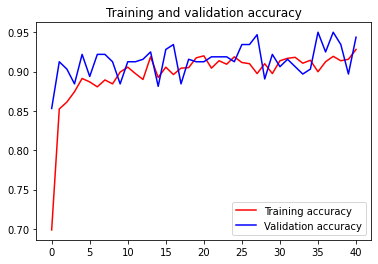

<Figure size 432x288 with 0 Axes>

In [25]:
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

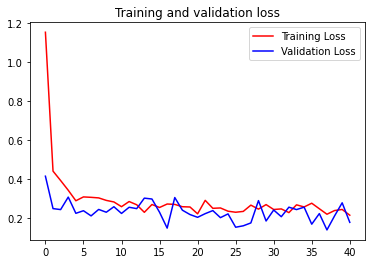

<Figure size 432x288 with 0 Axes>

In [26]:
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

#### Deployment TFLite

In [27]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmpm1bp22q0/assets


In [28]:
with tf.io.gfile.GFile('image-model.tflite', 'wb') as f:
  f.write(tflite_model)